# **DATA EXPLORATION AND VISUALIZATION**

In [140]:
#import libraries
import pandas as pd
import numpy as np
import csv
import ast
import re
from prettytable import PrettyTable

#spelling correction
import enchant
from spellchecker import SpellChecker
from autocorrect import Speller
from textblob import TextBlob


#data visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#NLP libraries
from nltk import FreqDist

In [122]:
#import cleaned data

def list_converter(text):
    #to revert list->str conversion from pd.read_csv
    return ast.literal_eval(text)


corpus = pd.read_csv('Data/corpus_v5.csv', converters ={'tokens':list_converter})

In [123]:
corpus.head()

,index,text_type,ID,year,long_text,clean_text,word_count,tokens
0,0,comment,gtfo2hl,2021,"*Cuntry roads, take me hoem*",cuntry roads hoem,3,"[cuntry, road, hoem]"
1,1,comment,gtfqkbv,2021,"That’s been there for several years, sent a pi...",years sent pic cuntry friend long time ago,8,"[year, send, pic, cuntry, friend, long, time, ..."
2,2,comment,gtfou07,2021,I am single and I have not traveled to any cun...,single traveled cuntry past year,5,"[single, travel, cuntry, past, year]"
3,3,comment,gtfrgpe,2021,What happens when you shop at dragon mart...,happens shop dragon mart,4,"[happen, shop, dragon, mart]"
4,5,comment,gthiiwi,2021,"That’s just absolutely hilarious, is this in t...",absolutely hilarious springs souk,4,"[absolutely, hilarious, spring, souk]"


In [124]:
#remove unwanted column
corpus = corpus.drop(columns = ['index'])

In [125]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100372 entries, 0 to 100371
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text_type   100372 non-null  object
 1   ID          100372 non-null  object
 2   year        100372 non-null  int64 
 3   long_text   100372 non-null  object
 4   clean_text  100372 non-null  object
 5   word_count  100372 non-null  int64 
 6   tokens      100372 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.4+ MB


In [126]:
#remove randomly sampled subset

#import sampled_subset

def list_converter(text):
    #to revert list->str conversion from pd.read_csv
    return ast.literal_eval(text)


sample_subset = pd.read_csv('Data/sampled_subset.csv', converters ={'tokens':list_converter})

In [127]:
#indices of subset
subset_ids = sample_subset['ID'].to_list()
subset_index = corpus[corpus['ID'].isin(subset_ids)].index.to_list()

In [128]:
#remove sample subset from corpus

new_corpus = corpus.drop(subset_index, axis = 0)
new_corpus.sort_values(by='word_count', ascending = False)

,text_type,ID,year,long_text,clean_text,word_count,tokens
96875,submission,gzl2ec,2020,"PSA: Immigration to Canada, Australia, NZ Hell...",psa immigration canada australia nz hello duba...,1342,"[psa, immigration, canada, australia, nz, hell..."
97101,submission,jh5hjq,2020,List of discounts and working promo codes in D...,list discounts working promo codes dubai hello...,1007,"[list, discount, working, promo, code, dubai, ..."
97067,submission,tce5mm,2022,Unknown accident and the plight with Dubai Pol...,unknown accident plight dubai police incident ...,785,"[unknown, accident, plight, dubai, police, inc..."
98208,submission,10kwnuo,2023,A complete list of LIFE HACK / TIPS / FACTS ab...,complete list life hack tips facts dubai uae n...,701,"[complete, list, life, hack, tip, fact, dubai,..."
4447,comment,ji1smg1,2023,"FULLTEXT\nApr 27, 2023\n\nStand in the middle ...",fulltext apr stand middle teeming meena bazaar...,659,"[fulltext, apr, stand, middle, teem, meena, ba..."
...,...,...,...,...,...,...,...
77947,comment,gc0spot,2020,The salt in this comment section..... 😂,salt comment section,3,"[salt, comment, section]"
7380,comment,fvv5m7t,2020,Would be abwar if there was an ا between و and...,abwar look alif,3,"[abwar, look, alif]"
77940,comment,gv1wwlu,2021,Fear not for I am the largest of all. Onwards!,fear largest onwards,3,"[fear, large, onwards]"
77936,comment,gv2az17,2021,He has nol microchip in his wing 🤣,nol microchip wing,3,"[nol, microchip, wing]"


In [129]:
new_corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99186 entries, 0 to 100371
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text_type   99186 non-null  object
 1   ID          99186 non-null  object
 2   year        99186 non-null  int64 
 3   long_text   99186 non-null  object
 4   clean_text  99186 non-null  object
 5   word_count  99186 non-null  int64 
 6   tokens      99186 non-null  object
dtypes: int64(2), object(5)
memory usage: 6.1+ MB


In [143]:
filename = 'Data/training_corpus.csv'

def export_csv():
    '''
    export pre-processed data to CSV
    '''
    new_corpus.to_csv(filename, index_label = 'index', quoting = csv.QUOTE_ALL, header = True)

export_csv()

In [130]:
#default plot settings

pio.templates.default = "plotly_white"

import matplotlib as mpl

#do not display right and top spines
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

#mpl.rcParams.keys()

### **BASIC STATS OF THE TEXT CORPUS**

In [142]:
all_words = [word for token_row in new_corpus['tokens'] for word in token_row]#list of all words in the dataframe
unique_words = set(all_words) #collection of unique words in the dataset
total_all_words = len(all_words) #total number of words in the dataset
total_unique_words = len (unique_words) #total number of unique words in the dataset
#avg_word_count = new_corpus.word_count.mean()  #average word count in dataset
longest_document = new_corpus.word_count.max()
shortest_document = new_corpus.word_count.min()
avg_doc_length = new_corpus.word_count.mean()

#avg_word_length 

print (f'total number of words in the text corpus: {total_all_words}')
print (f'total number of unique words in the text corpus: {total_unique_words}')
#print (f'average length of documents: {avg_word_count:.2f}')

print (f'longest document: {longest_document}')
print (f'shortest document: {shortest_document}')
print (f'average length of document: {avg_doc_length:.2f}')

#print (f'longest word: {longest_word}')
#print (f'shortes word: {shortest_word}')

total number of words in the text corpus: 1409136
total number of unique words in the text corpus: 39837
longest document: 1342
shortest document: 3
average length of document: 14.21


In [ ]:
#bar graph of ten longest posts and ten longest comments. same for least
#bar graph for ten longest words and ten shortest words

## **Number of Submissions/Comments per Year**

In [132]:
#data per year
# Count the number of posts for each year
year_counts = new_corpus['year'].value_counts().to_dict()

# Create a dictionary showing years and the number of posts for each year
posts_per_year = {year: count for year, count in year_counts.items()}

print(posts_per_year)

{2022: 28127, 2020: 22779, 2021: 21879, 2023: 20921, 2019: 2813, 2018: 1231, 2017: 784, 2016: 492, 2015: 80, 2014: 54, 2013: 21, 2012: 5}


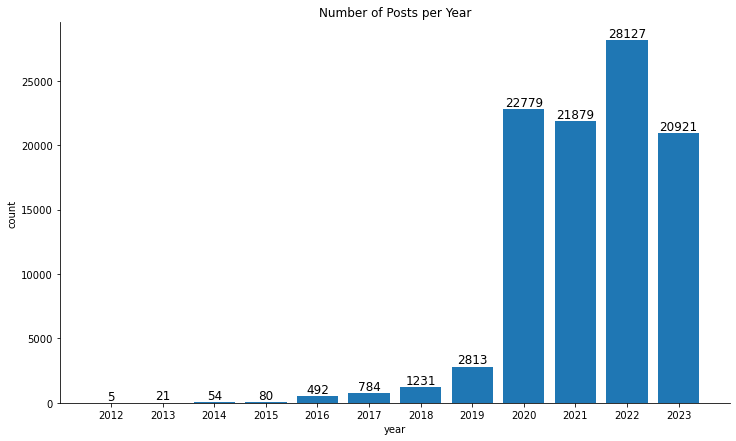

In [133]:
#dataframe holding years and number of posts made in each year
year = new_corpus['year'].value_counts().reset_index()
year.columns = ['year', 'count'] #rename column labels

#plot the number of posts per year
plt.figure(figsize=(12, 7))
plot = plt.bar(year['year'], year['count'])

plt.xticks(year['year']) #display all ticks
plt.xlabel('year')
plt.ylabel('count')
plt.title('Number of Posts per Year')

plt.bar_label(plot, fmt='%d', label_type='edge', fontsize=12)

plt.show()

### **Most Frequent Words**

In [152]:
#list of all words in the dataframe
all_words = [word for token_row in new_corpus['tokens'] for word in token_row]

#frequency of word occurrence
fdist = FreqDist(all_words)

common_words = fdist.most_common(100)

#table of common words
common_words_table = PrettyTable(['word', 'count'])
for word, count in common_words:
    common_words_table.add_row([word, count])

#print (common_words_table)

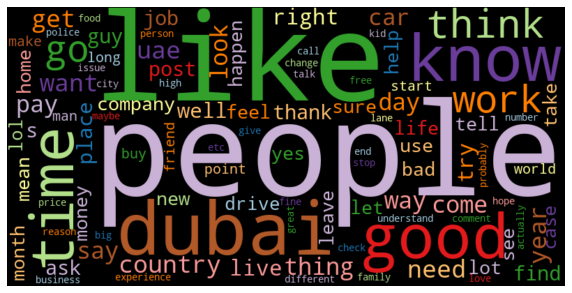

In [135]:
#wordcloud of most frequent words
# Create a dictionary of rare words and their frequencies
common_word_freq = {word: freq for word, freq in common_words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,  background_color="black", colormap="Paired").generate_from_frequencies(common_word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Rare Words**

In [151]:
rare_words = fdist.most_common()[:-100:-1]

#table of the rare words 
rare_words_table = PrettyTable(['word', 'count'])
for word, count in rare_words:
    rare_words_table.add_row([word,count])

#print (rare_words_table)

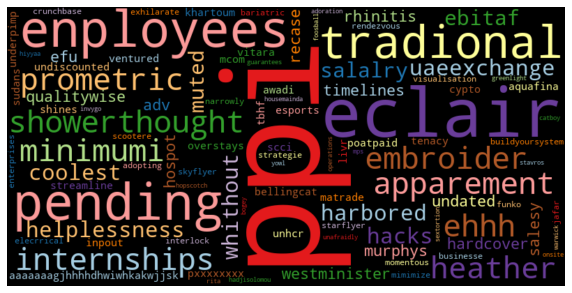

In [137]:
#a wordcloud of the rare words

# Create a dictionary of rare words and their frequencies
rare_word_freq = {word: freq for word, freq in rare_words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Paired").generate_from_frequencies(rare_word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [159]:
#remove most occuring and least occuring words

In [157]:
#find all words with frequency of one
singular_freq = [word for word, freq in fdist.items() if freq <= 10]

print (f"number of words occuring only once: {len(singular_freq)}")

number of words occuring only once: 31654
